In [1]:
import numpy as np
import pandas as pd

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

from sklearn.impute import KNNImputer

import seaborn as sns
import matplotlib.pyplot as plt

## 1. Problem Statement

## 2. Data Gathering

In [2]:
df = pd.read_csv(r"C:\Users\rishi\OneDrive\Desktop\Python lectures\Models\Car price prediction\car_price_predictor-master\quikr_car.csv")
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [3]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

## 3. Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [5]:
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

### Clean Data

In [6]:
df['year'].unique()
df['year'] = df['year'].apply(lambda x : x if x.isnumeric() else np.nan).astype(float)

In [7]:
imputer = KNNImputer()
array_year = np.around(imputer.fit_transform(df[['year']]),0)

<AxesSubplot: xlabel='year'>

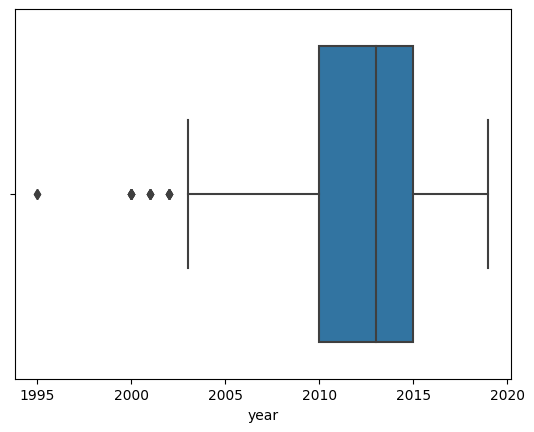

In [8]:
sns.boxplot(x= df['year'])

In [9]:
q1 = np.nanquantile(df['year'],.25)
q2 = np.nanquantile(df['year'],.5)
q3 = np.nanquantile(df['year'],.75)

iqr = q3 - q1
lower_tail = int(q1 - 1.5 * iqr)
print('Lower tail =' , lower_tail)

Lower tail = 2002


In [10]:
df['year'][df['year'] < lower_tail] = lower_tail

C:\Users\rishi\AppData\Local\Temp\ipykernel_2000\1381874535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'][df['year'] < lower_tail] = lower_tail


<AxesSubplot: xlabel='year', ylabel='Density'>

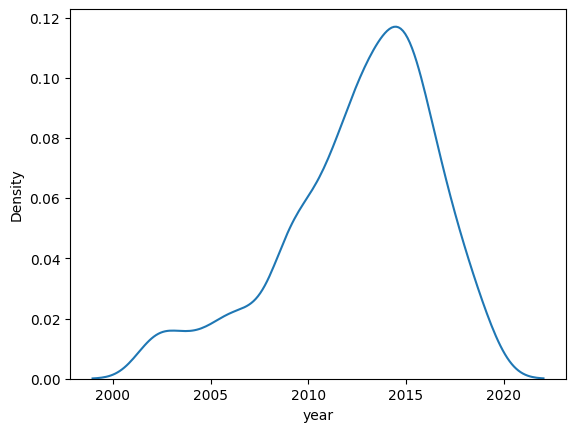

In [11]:
sns.kdeplot(x=df['year'])

In [12]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007.0,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006.0,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018.0,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014.0,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014.0,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,NaN,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018.0,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013.0,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014.0,"1,80,000",Petrol,NaN


In [13]:
df['year'][df['year'].isna()] = df['year'].mean

C:\Users\rishi\AppData\Local\Temp\ipykernel_2000\834245135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'][df['year'].isna()] = df['year'].mean
